In [1]:
pip install wooldridge

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 30.8 MB/s eta 0:00:00


In [2]:
pip install stargazer

# EJERCICIOS EN COMPUTADORA

In [3]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wooldridge import data
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

## Problema 3

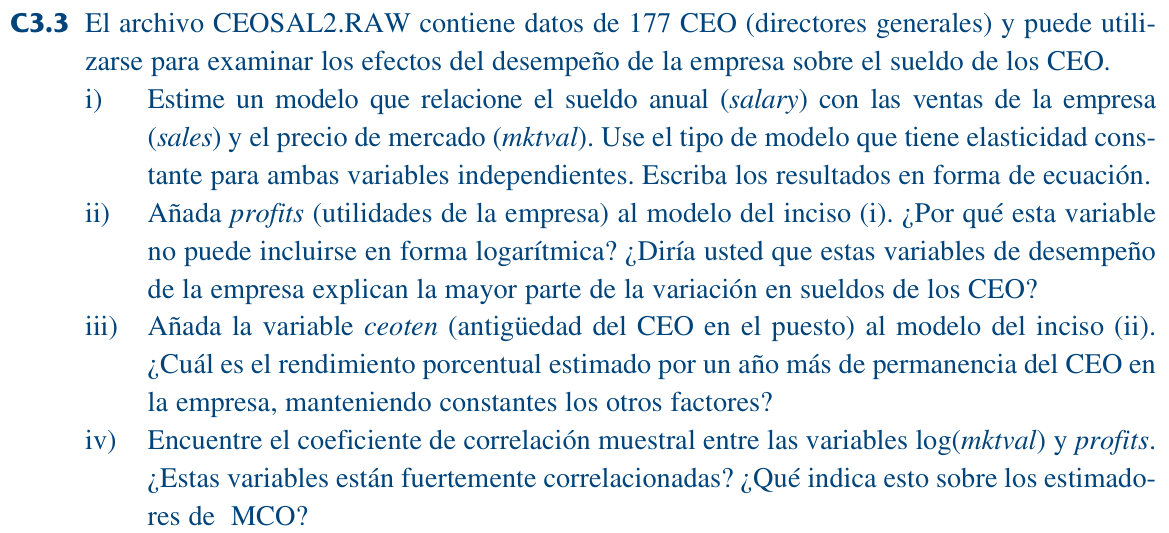

In [4]:
# Ejercicio C3.3
# Cargar los datos CEOSAL2.RAW
data_ceosal2 = data('ceosal2')
data_ceosal2.head()

,salary,age,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg
0,1161,49,1,1,9,2,6200.0,966,23200.0,7.057037,8.732305,10.051908,81,4,15.580646
1,600,43,1,1,10,10,283.0,48,1100.0,6.396930,5.645447,7.003066,100,100,16.961130
2,379,51,1,1,9,3,169.0,40,1100.0,5.937536,5.129899,7.003066,81,9,23.668638
3,651,55,1,0,22,22,1100.0,-54,1000.0,6.478509,7.003066,6.907755,484,484,-4.909091
4,497,44,1,1,8,6,351.0,28,387.0,6.208590,5.860786,5.958425,64,36,7.977208


### Parte I

In [5]:
# Parte i: Modelo con elasticidad constante para salary en función de sales y mktval
X1 = data_ceosal2[['lsales','lmktval']]
X1 = sm.add_constant(X1)
y1 = data_ceosal2['lsalary']

In [6]:
# Estimación del modelo
model_ceo1 = sm.OLS(y1, X1).fit()

# Resultados del modelo del inciso i
b0_i = model_ceo1.params['const']
b1_i = model_ceo1.params['lsales']
b2_i = model_ceo1.params['lmktval']
ecuacion_i = f"log(salary) = {b0_i:.4f} + {b1_i:.4f}*log(sales) + {b2_i:.4f}*log(mktval)"
print(ecuacion_i)

log(salary) = 4.6209 + 0.1621*log(sales) + 0.1067*log(mktval)


In [7]:
print(model_ceo1.summary())

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     37.13
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           3.73e-14
Time:                        04:21:31   Log-Likelihood:                -130.56
No. Observations:                 177   AIC:                             267.1
Df Residuals:                     174   BIC:                             276.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6209      0.254     18.163      0.0

### Parte II

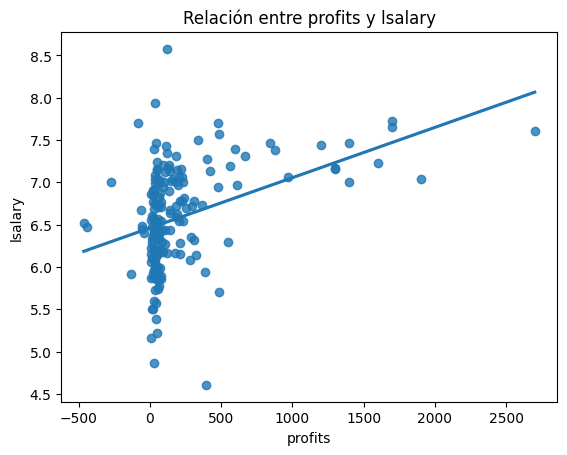

In [8]:
sns.regplot(data_ceosal2,x='profits',y='lsalary', ci=None)
# Personalización del gráfico (opcional)
plt.title('Relación entre profits y lsalary')
plt.xlabel('profits')
plt.ylabel('lsalary')
plt.show()

In [9]:
# Parte ii: Agregar profits al modelo del inciso i
X2 = data_ceosal2[['lsales','lmktval','profits']]
X2 = sm.add_constant(X2)

# Estimación del modelo
model_ceo2 = sm.OLS(y1, X2).fit()

# Respuesta sobre profits en forma logarítmica
respuesta_ii = "La variable profits no puede incluirse en forma logarítmica porque contiene valores no positivos, lo que impide calcular el logaritmo."
r_squared_ii = model_ceo2.rsquared

In [10]:
print(model_ceo2.summary())

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     24.64
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           2.53e-13
Time:                        04:21:31   Log-Likelihood:                -130.53
No. Observations:                 177   AIC:                             269.1
Df Residuals:                     173   BIC:                             281.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6869      0.380     12.343      0.0

### Parte III

In [11]:
# Parte iii: Agregar ceoten al modelo del inciso ii
X3 = data_ceosal2[['lsales','lmktval','ceoten']]
X3 = sm.add_constant(X3)

# Estimación del modelo
model_ceo3 = sm.OLS(y1, X3).fit()
coef_ceoten = model_ceo3.params['ceoten']
rendimiento_ceoten = (np.exp(coef_ceoten) - 1) * 100
print(f"Rendimiento (%) esperado {rendimiento_ceoten:.2f}")

Rendimiento (%) esperado 1.18


### Parte IV

In [12]:
# Parte iv: Correlación entre log(mktval) y profits
correlacion_iv = data_ceosal2['lmktval'].corr(data_ceosal2['profits'])
respuesta_iv = f"Las variables log(mktval) y profits están fuertemente correlacionadas con r={correlacion_iv:.2f}"
print(respuesta_iv)

Las variables log(mktval) y profits están fuertemente correlacionadas con r=0.78
